In [1]:
import torch
import matplotlib.pyplot as plt
from schedulers import LinearWarmupCosineAnnealingLR

In [5]:
def plot(optimizer, scheduler, steps=100):
    lrs = []
    for _ in range(steps):
        optimizer.step()
        lrs.append(scheduler.get_last_lr())
        scheduler.step()

    plt.plot(lrs)
    plt.show()

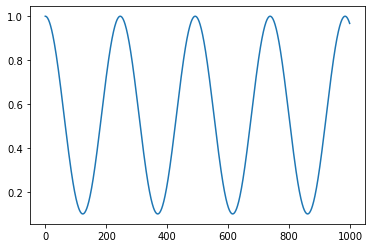

In [6]:
STEPS = 1000
optimizer = torch.optim.SGD([torch.tensor(1)], lr=1)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=123, eta_min=0.1)
plot(optimizer, scheduler, STEPS)

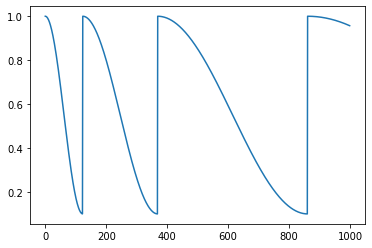

In [8]:
STEPS = 1000
optimizer = torch.optim.SGD([torch.tensor(1)], lr=1)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=123, T_mult=2, eta_min=0.1)
plot(optimizer, scheduler, STEPS)

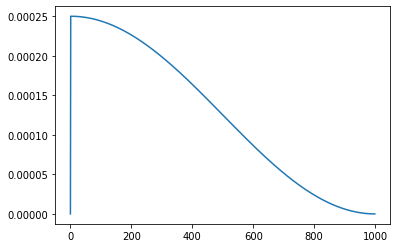

In [13]:
STEPS = 1000
optimizer = torch.optim.SGD([torch.tensor(1)], lr=2.5e-4)
scheduler = LinearWarmupCosineAnnealingLR(
    optimizer,
    warmup_epochs=1,
    max_epochs=1000,
    warmup_start_lr=0,
    eta_min=0
)
plot(optimizer, scheduler, STEPS)